### Functionality 3 - Shortest Ordered Route

In [13]:
## Import Utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from datetime import datetime, date
import math
from matplotlib.pyplot import figure

In [6]:
## Load Data (answers to questions)
with open('sx-stackoverflow-a2q.txt') as f:
    a2q = f.readlines()

In [7]:
## Load Data (comments to questions)
with open('sx-stackoverflow-c2q.txt') as f:
    c2q = f.readlines()

In [8]:
## Load Data (comments to answers)
with open('sx-stackoverflow-c2a.txt') as f:
    c2a = f.readlines()

In [9]:
## Init Graph
G = nx.DiGraph()

In [11]:
## Merge Graph about 1 year
t_start = datetime(2009, 10, 1)
t_end = datetime(2010, 10, 1)
for line in a2q:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G.has_edge(line[0], line[1]) :
            G[line[0]][line[1]]['weight'] += 0.6
            G[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G.add_edge(line[0], line[1], weight=0.6)
            G[line[0]][line[1]]['timestamp']=[t_truncated]

for line in c2q:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G.has_edge(line[0], line[1]) :
            G[line[0]][line[1]]['weight'] += 0.3
            G[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G.add_edge(line[0], line[1], weight=0.3)
            G[line[0]][line[1]]['timestamp']=[t_truncated]

for line in c2a:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G.has_edge(line[0], line[1]) :
            G[line[0]][line[1]]['weight'] += 0.1
            G[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G.add_edge(line[0], line[1], weight=0.1)
            G[line[0]][line[1]]['timestamp']=[t_truncated]

Dijkstra's shortest path algorithm works as follows:

> Let distance of start vertex from start vertex = *0*. 

> Let distance of all other vertices from start = *+ Inf*.

**Repeat**
1. Visit the unvisited vertex with the smallest known distance from the start vertex.
2. For the current vertex, examine its unvisited neighbours.
3. For the current vertex, calculate distance of each neighbour from start vertex.
4. If the calculated distance of a vertex is less than the known distance, update the shortest distance.
5. Update the previous vertex for each of the updated distances.
6. Add the current vertex to the ist of a visited vertices.

Until all vertices visited.

In [12]:
def shortest_path(G, source, target):
    unvisited = list(nx.nodes(G)) ## all nodes
    dist = {} ## distances from each node to source
    previous = {} ## previous node
    
    for node in unvisited:
        dist[node] = math.inf
        previous[node] = None
    dist[source] = 0 ## The distance of the source node is 0
    
    while unvisited:  
        dist_min = math.inf
        for node in unvisited:
            if dist[node] <= dist_min :
                dist_min = dist[node]
                u = node
        unvisited.remove(u) ## removing the node from the list of the unvisited nodes
        
        ## if the visited node is the target stop the visits
        if u == target:
            break
            
        ## Examine its neighbours
        for neighbor in G.neighbors(u):
            new_dist = dist[u] + G[u][neighbor]['weight']
            if dist[neighbor] > new_dist:
                ## update the shortest distance
                dist[neighbor] = new_dist
                ## update the previous node
                previous[neighbor] = u
                
    if previous[target] == None:
        return ('Not Connected', [])
    
    path = [target]
    while source not in path:
        path.append(previous[path[-1]])
    path.reverse()

    return dist[target], path # return the distance

In [52]:
def func_3(time, sequence, users):
    ## SubGraph 1 day
    time_start = time[0]
    time_end = time[1]
    subG = nx.DiGraph()
    for edge in list(G.edges):
        if time_start <= G.edges[edge[0], edge[1]]['timestamp'][0] < time_end:
            subG.add_edge(edge[0], edge[1])
            subG[edge[0]][edge[1]]['weight'] = G.edges[edge[0], edge[1]]['weight']
            subG[edge[0]][edge[1]]['timestamp'] = G.edges[edge[0], edge[1]]['timestamp']

    tot_dist = 0
    path_res = [users[0]]
    new_users = [users[0]] + sequence + [users[1]]
    for i in range(len(new_users) - 1):
        dist,path = shortest_path(subG, new_users[i], new_users[i + 1])
        if dist == 'Not Connected':
            return 'Not Connected'
        tot_dist += dist
        path_res += path[1:]
    
    return tot_dist, path_res

In [60]:
## Check
func_3((date(2010, 1, 6), date(2010, 1, 7)), ['190807', '1185165', '237291', '237696', '195257', '7516', '60724', '163534', '231677', '51819',
                                              '109702', '28896', '17516', '167375'] , ('122004', '123451'))

(4.2,
 ['122004',
  '190807',
  '1185165',
  '237291',
  '237696',
  '195257',
  '7516',
  '60724',
  '163534',
  '231677',
  '51819',
  '109702',
  '28896',
  '17516',
  '167375',
  '123451'])

### Visualization 3 - Shortest Ordered Route

In [57]:

seq = ['122004', '190807', '219092', '174994', '233867', '53185', '59035', '233228', '230637', '1185165', '79307',
               '177779', '17122', '237696', '237291', '195257', '411472', '607', '7516', '60724', '1144', '163534', '175084',
               '225808', '238134', '219159', '231677', '3571', '244279', '126353', '240698', '201934', '170995', '67350',
               '51819', '198989', '243977', '179910', '223783', '102703', '244184', '26552', '109702', '28896', '17516',
               '198116', '244233', '219862', '99897', '56564', '123451', '219922', '17378', '199722', '243494', '79948', 
               '108663', '140962', '167375', '188822', '90011', '5017'] 

In [50]:
New_G = nx.subgraph(G, seq)

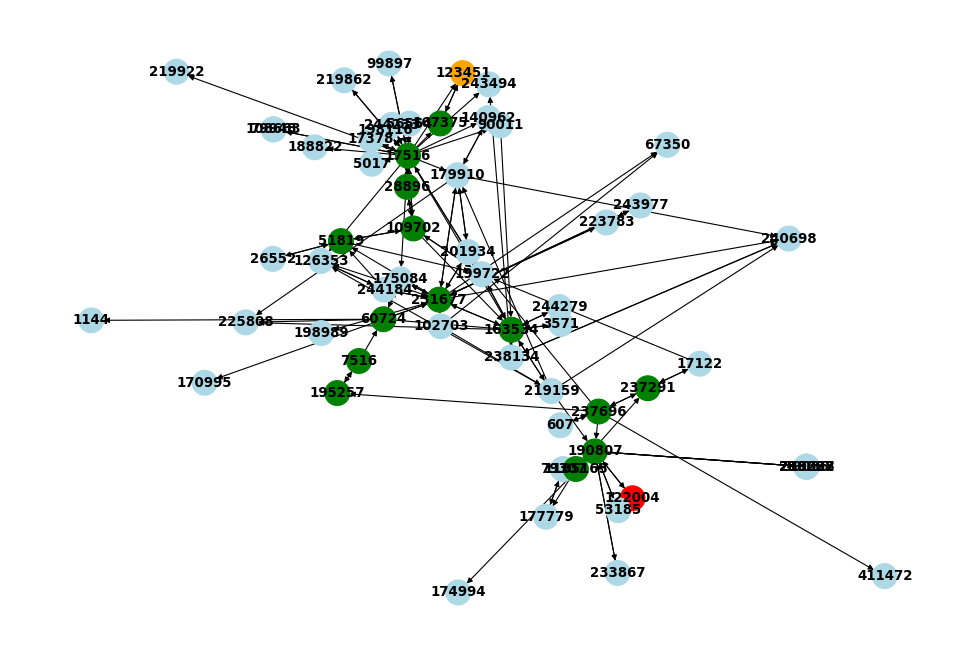

In [51]:
figure(figsize=(12, 8), dpi=80)
color_map = []
for node in New_G:
    if node in ['190807', '1185165', '237291', '237696', '195257', '7516', '60724', '163534', '231677', '51819',
                '109702', '28896', '17516', '167375']:
        color_map.append('green')
    elif node == '122004': 
        color_map.append('red')  
    elif node == '123451':
        color_map.append('orange')
    else:
        color_map.append('lightblue')
nx.draw_kamada_kawai(New_G, with_labels=True, font_weight='bold', node_color=color_map, node_size=500)
plt.show()